In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#DataSet 1 (Health Care)
path_health = kagglehub.dataset_download("rabieelkharoua/chronic-kidney-disease-dataset-analysis")
print("Path to dataset files:", path_health)

#DataSet 2 (Marketing)
path_marketing = kagglehub.dataset_download("rodsaldanha/arketing-campaign")
print("Path to dataset files:", path_marketing)

#DataSet 3 (Energy)
path_energy = kagglehub.dataset_download("guillemservera/fuels-futures-data")
print("Path to dataset files:", path_energy)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis/versions/1
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/rodsaldanha/arketing-campaign/versions/8
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/guillemservera/fuels-futures-data/versions/191


In [3]:
#Health Dataframe
path_to_file = os.path.join(path_health, "Chronic_Kidney_Dsease_data.csv")
df_health = pd.read_csv(path_to_file)

#Marketing Dataframe
path_to_file_two = os.path.join(path_marketing, "marketing_campaign.csv")
df_marketing = pd.read_csv(path_to_file_two, sep=";")

#Energy Dataframe
path_to_file_three = os.path.join(path_energy, "all_fuels_data.csv")
df_energy = pd.read_csv(path_to_file_three)

In [4]:
#Health Information EDA
# 1. Quick Summary

df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [5]:
# 2. Stats
print(df_health.describe())

         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252          

In [6]:
# 3. Dups
print("Row-dups:", df_health.duplicated().sum())
print("PatientID-dups:", df_health['PatientID'].duplicated().sum())

Row-dups: 0
PatientID-dups: 0


In [7]:
# 4. Nulls
print("Nulls:\n", df_health.isnull().sum())

Nulls:
 PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectro

In [9]:
# 5. Inconsistencies
print("Bad ages:\n", df_health[(df_health['Age']<0)|(df_health['Age']>120)])
print("Bad activity:\n", df_health[df_health['PhysicalActivity']<0])

# 6. One-hot encode
df_health_ready = pd.get_dummies(
    df_health,
    columns=['Gender','Ethnicity','SocioeconomicStatus','EducationLevel','Smoking'])

Bad ages:
 Empty DataFrame
Columns: [PatientID, Age, Gender, Ethnicity, SocioeconomicStatus, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryKidneyDisease, FamilyHistoryHypertension, FamilyHistoryDiabetes, PreviousAcuteKidneyInjury, UrinaryTractInfections, SystolicBP, DiastolicBP, FastingBloodSugar, HbA1c, SerumCreatinine, BUNLevels, GFR, ProteinInUrine, ACR, SerumElectrolytesSodium, SerumElectrolytesPotassium, SerumElectrolytesCalcium, SerumElectrolytesPhosphorus, HemoglobinLevels, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, ACEInhibitors, Diuretics, NSAIDsUse, Statins, AntidiabeticMedications, Edema, FatigueLevels, NauseaVomiting, MuscleCramps, Itching, QualityOfLifeScore, HeavyMetalsExposure, OccupationalExposureChemicals, WaterQuality, MedicalCheckupsFrequency, MedicationAdherence, HealthLiteracy, Diagnosis, DoctorInCharge]
Index: []

[0 rows x 54 columns]
Bad activity:
 Empty DataFrame
Colu

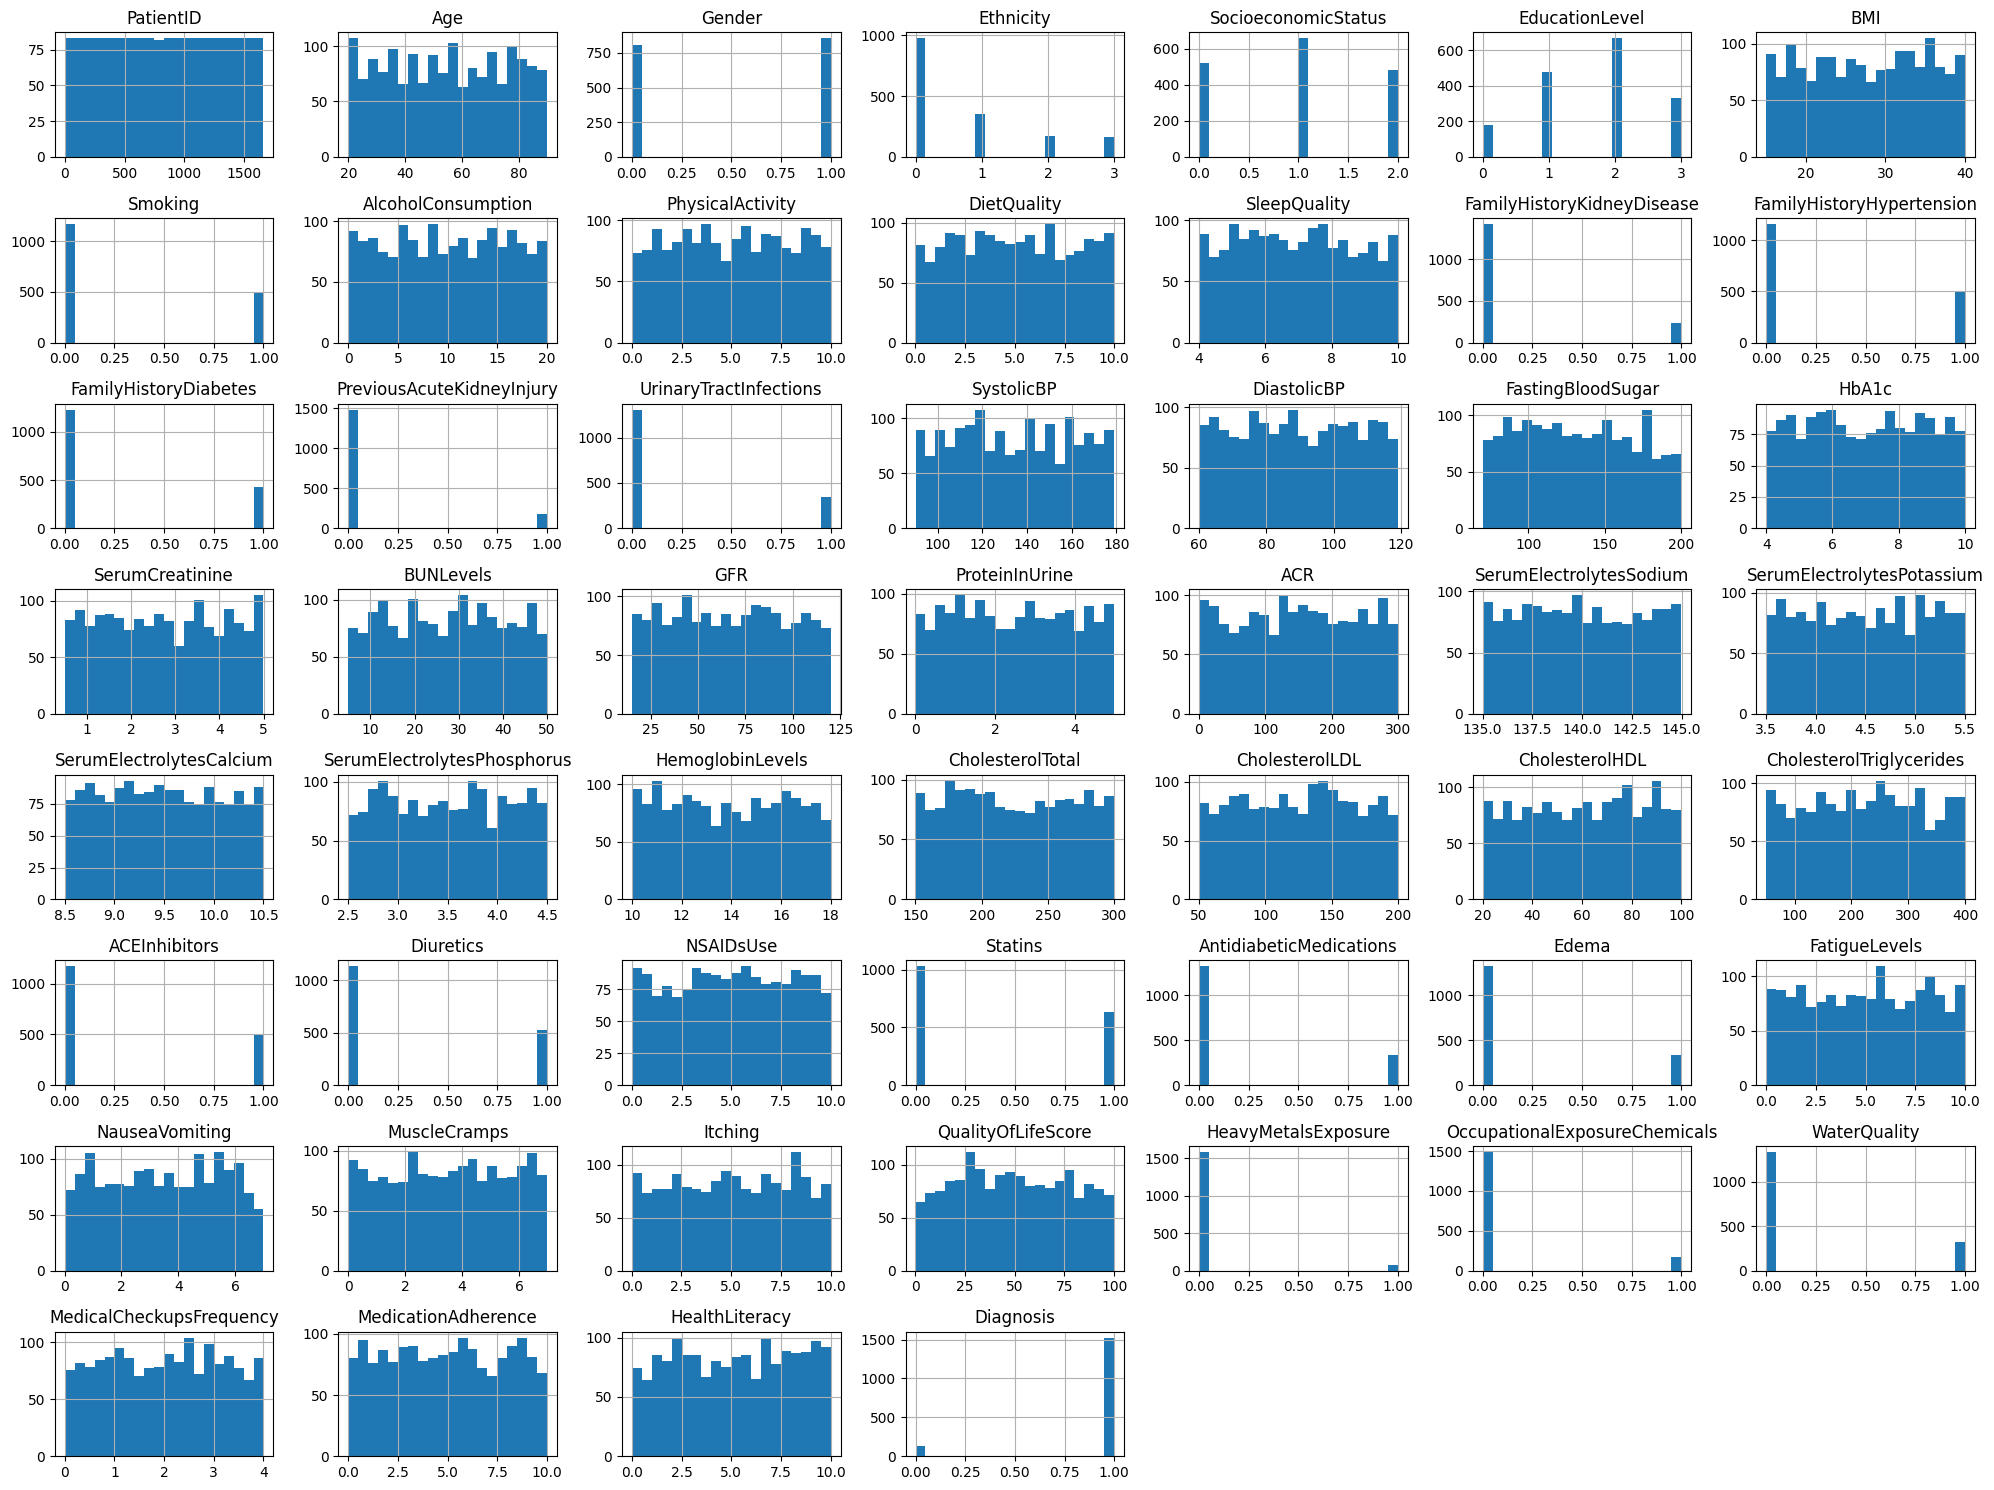

In [10]:
# 8. Frequency 

num_cols = df_health.select_dtypes(include=['int64','float64']).columns

# draw a histogram for each numeric column
df_health[num_cols].hist(bins=20, figsize=(20, 15))

plt.tight_layout()
plt.show()

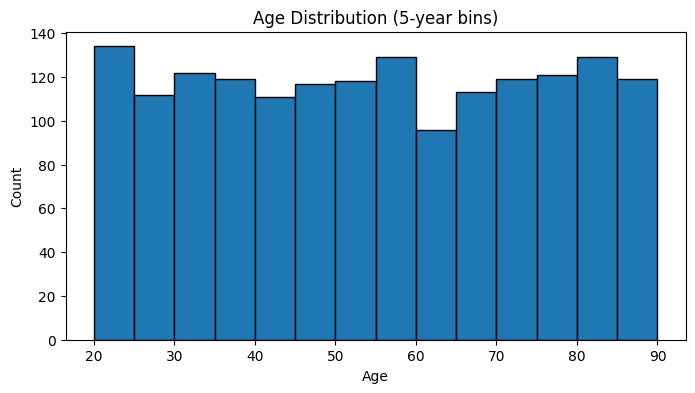

In [25]:
ages = df_health['Age']

bin_width = 5
bins = np.arange(ages.min(), ages.max() + bin_width, bin_width)

plt.figure(figsize=(8,4))
plt.hist(ages, bins=bins, edgecolor='black')
plt.title('Age Distribution (5-year bins)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




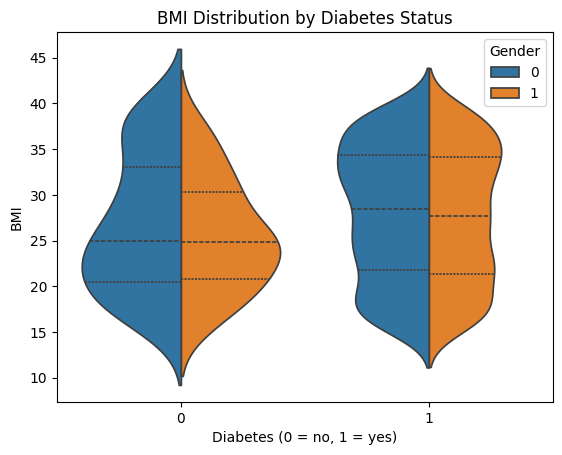

In [27]:
sns.violinplot(
    x="Diagnosis",      
    y="BMI", 
    hue= "Gender",
    split=True,           
    data=df_health,
    inner="quartile"    
)
plt.xlabel("Diabetes (0 = no, 1 = yes)")
plt.ylabel("BMI")
plt.title("BMI Distribution by Diabetes Status")
plt.show()

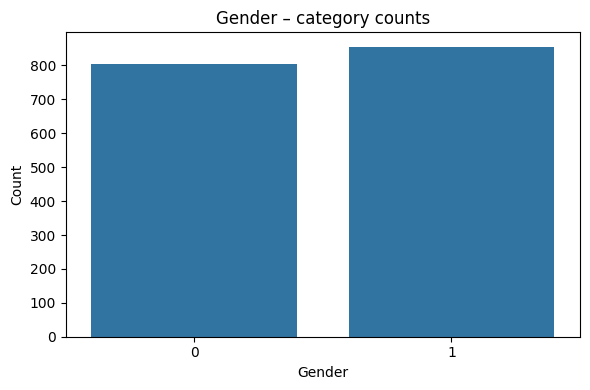

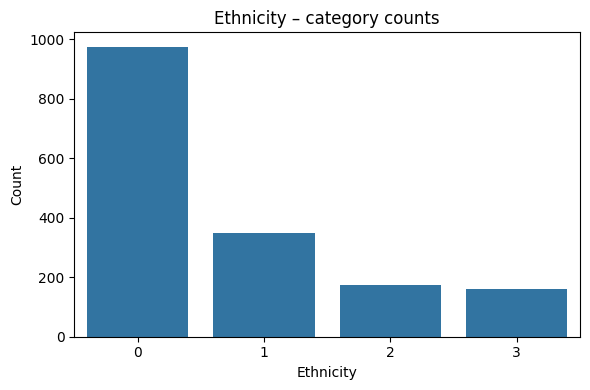

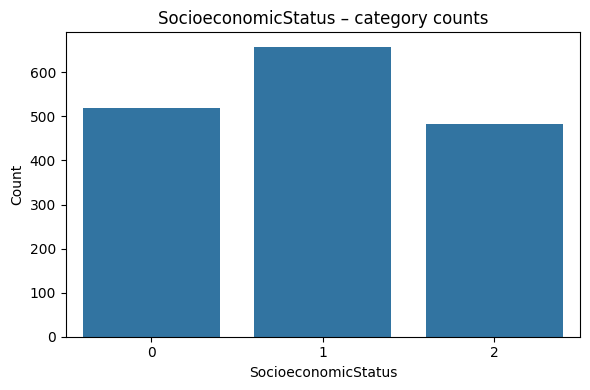

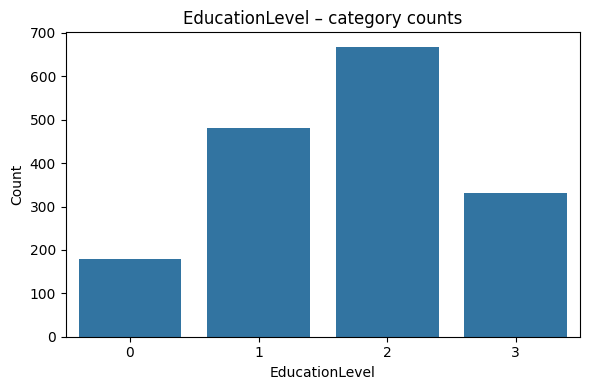

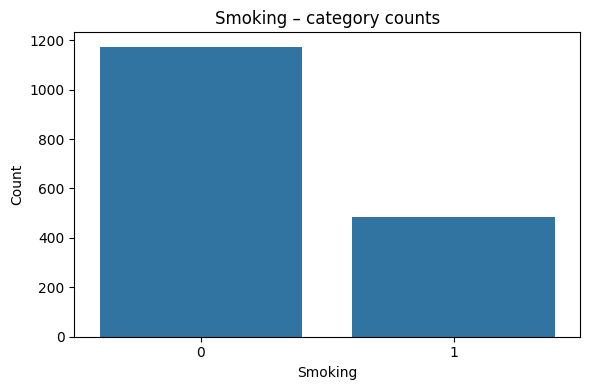

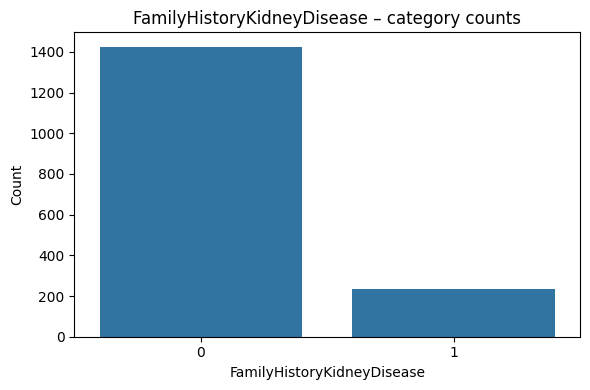

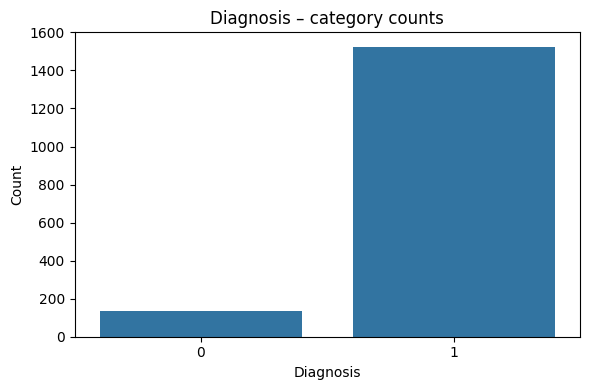

In [12]:
cat_cols = [
    "Gender", "Ethnicity", "SocioeconomicStatus",
    "EducationLevel", "Smoking", "FamilyHistoryKidneyDisease",
    "Diagnosis", 
]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_health)
    plt.title(f"{col} – category counts")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks   
    plt.tight_layout()
    plt.show()


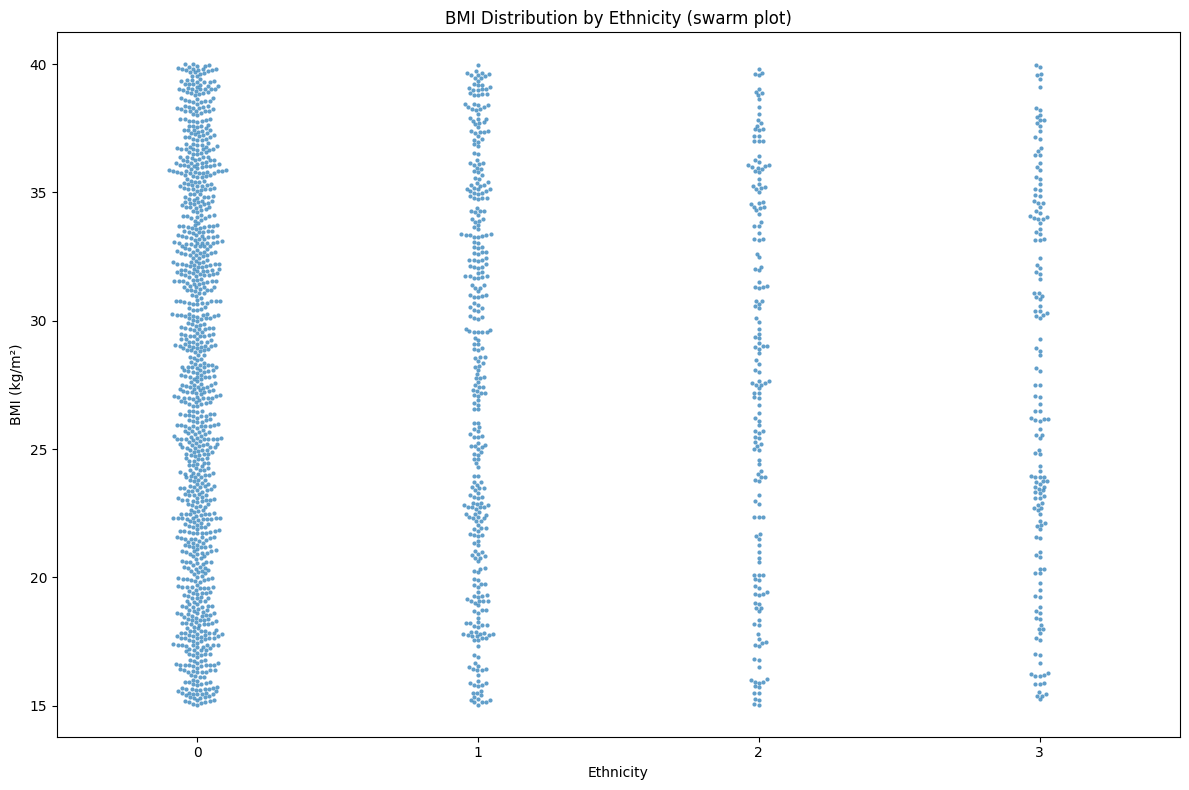

In [13]:
plt.figure(figsize=(12,8))
sns.swarmplot(
    x="Ethnicity",     
    y="BMI",           
    data=df_health,
    size=3,            
    alpha=0.7          
)
plt.xticks           
plt.xlabel("Ethnicity")
plt.ylabel("BMI (kg/m²)")
plt.title("BMI Distribution by Ethnicity (swarm plot)")
plt.tight_layout()
plt.show()


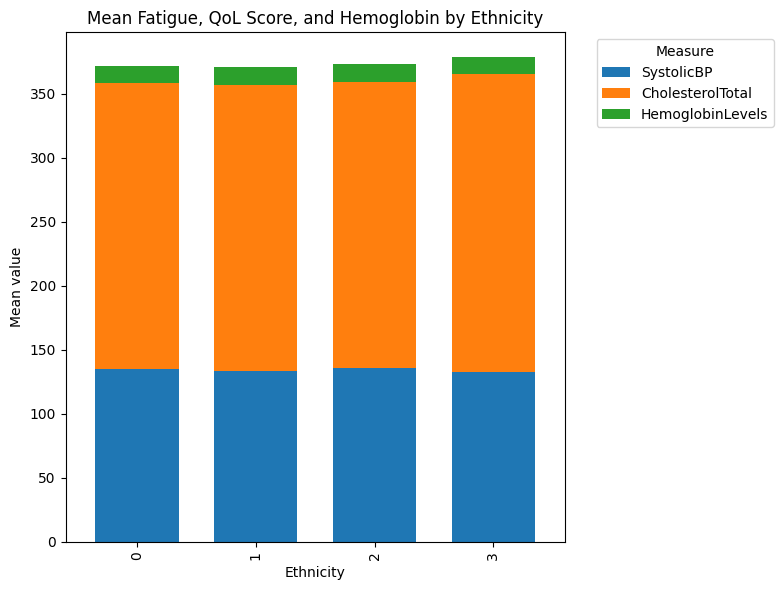

In [ ]:
vars_to_stack = ["SystolicBP", "CholesterolTotal", "HemoglobinLevels"]


grouped = df_health.groupby("Ethnicity")[vars_to_stack].mean()


ax = grouped.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6),
    width=0.7
)


ax.set_xlabel("Ethnicity")
ax.set_ylabel("Mean value")
ax.set_title("Mean Fatigue, QoL Score, and Hemoglobin by Ethnicity")
ax.legend(title="Measure", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

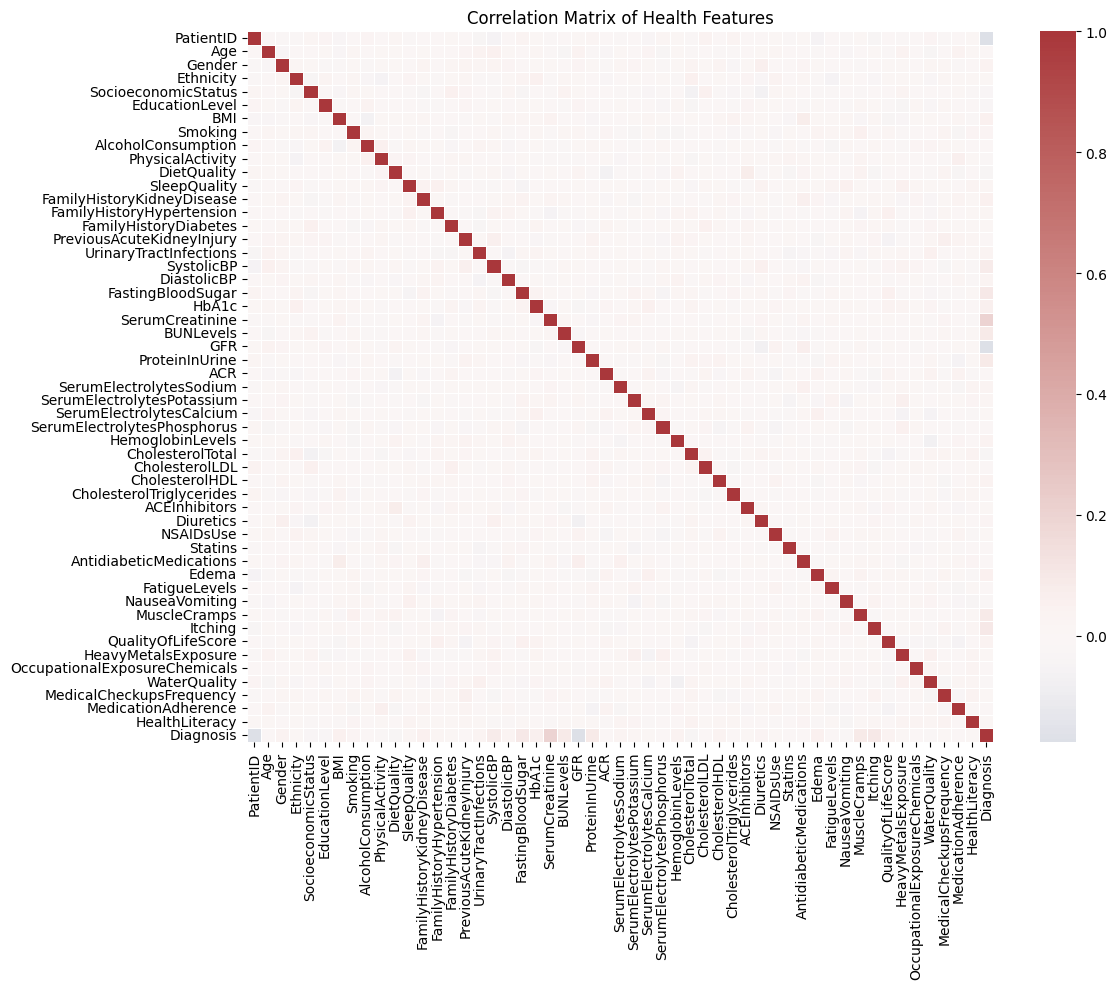

In [ ]:
num_df = df_health.select_dtypes(include="number")
corr   = num_df.corr()


plt.figure(figsize=(12,10))
ax = sns.heatmap(
    corr,
    cmap="vlag",
    center=0,
    linewidths=0.5,
    xticklabels=corr.columns,   
    yticklabels=corr.columns    
)


ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

plt.title("Correlation Matrix of Health Features")
plt.tight_layout()
plt.show()


In [ ]:

corr = df_health.corr(numeric_only=True)


diag_corr = corr["Diagnosis"].drop("Diagnosis")   

diag_corr_abs_sorted = diag_corr.abs().sort_values(ascending=False)

print(diag_corr_abs_sorted)


SerumCreatinine                  0.201125
GFR                              0.175988
PatientID                        0.171405
Itching                          0.100652
FastingBloodSugar                0.095694
MuscleCramps                     0.094811
BUNLevels                        0.093097
ProteinInUrine                   0.090014
SystolicBP                       0.083528
HbA1c                            0.059999
BMI                              0.055222
FamilyHistoryKidneyDisease       0.050935
Edema                            0.050857
DietQuality                      0.044503
CholesterolHDL                   0.044342
HemoglobinLevels                 0.044001
Gender                           0.042239
CholesterolTotal                 0.041897
QualityOfLifeScore               0.040657
EducationLevel                   0.037343
DiastolicBP                      0.036383
UrinaryTractInfections           0.034617
SocioeconomicStatus              0.034104
SerumElectrolytesSodium          0

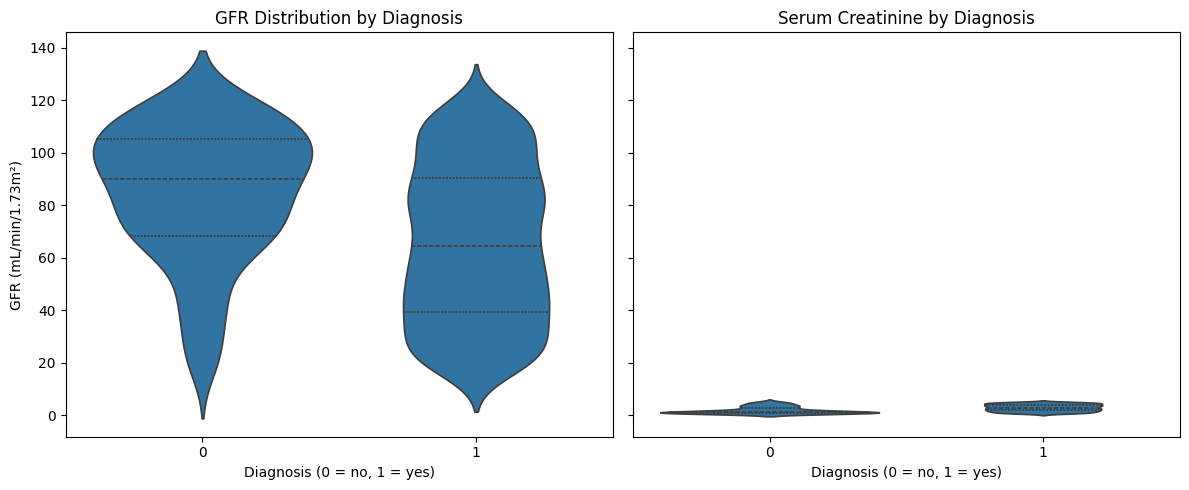

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# GFR by Diagnosis
sns.violinplot(
    x='Diagnosis',
    y='GFR',
    data=df_health,
    ax=axes[0],
    inner='quartile'       
)
axes[0].set_title('GFR Distribution by Diagnosis')
axes[0].set_xlabel('Diagnosis (0 = no, 1 = yes)')
axes[0].set_ylabel('GFR (mL/min/1.73m²)')

# Serum Creatinine by Diagnosis
sns.violinplot(
    x='Diagnosis',
    y='SerumCreatinine',
    data=df_health,
    ax=axes[1],
    inner='quartile'
)
axes[1].set_title('Serum Creatinine by Diagnosis')
axes[1].set_xlabel('Diagnosis (0 = no, 1 = yes)')
axes[1].set_ylabel('')  

plt.tight_layout()
plt.show()


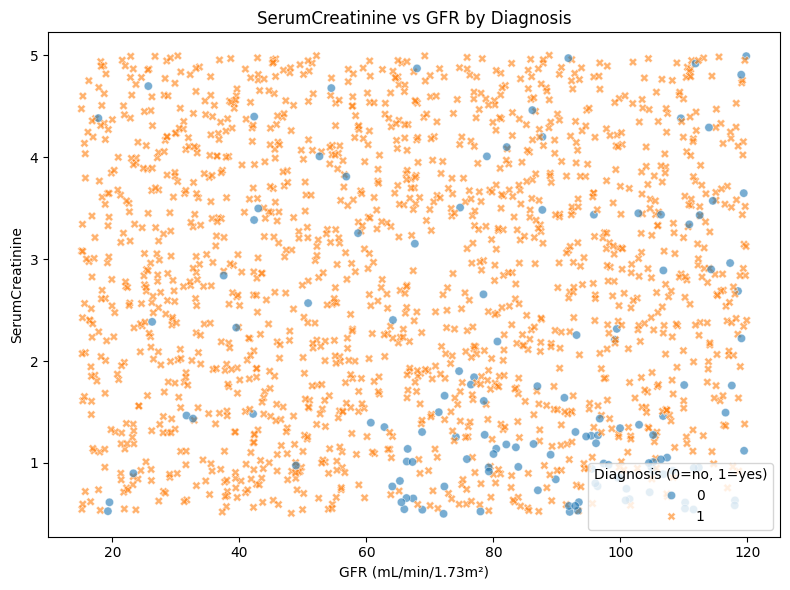

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='GFR',
    y='SerumCreatinine',
    hue='Diagnosis',          
    style='Diagnosis',        
    data=df_health,
    alpha=0.6                  
)
plt.title('SerumCreatinine vs GFR by Diagnosis')
plt.xlabel('GFR (mL/min/1.73m²)')
plt.ylabel('SerumCreatinine')
plt.legend(title='Diagnosis (0=no, 1=yes)')
plt.tight_layout()
plt.show()


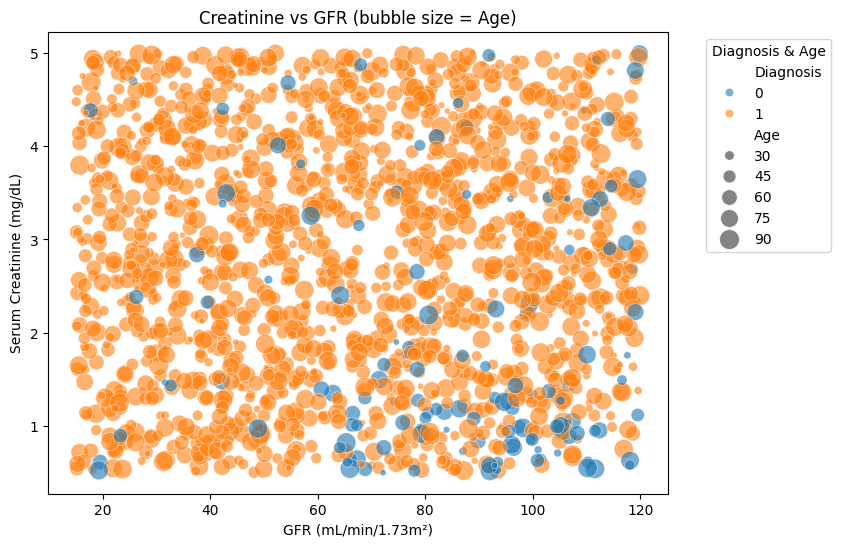

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='GFR',
    y='SerumCreatinine',
    size='Age',                   
    sizes=(20, 200),              
    hue='Diagnosis',
    data=df_health,
    alpha=0.6
)
plt.legend(title='Diagnosis & Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('GFR (mL/min/1.73m²)')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.title('Creatinine vs GFR (bubble size = Age)')
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df_health[['GFR', 'SerumCreatinine']]
y = df_health['Diagnosis']  


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


print("Coefficients:", lr.coef_)      
print("Intercept:", lr.intercept_)
print("Test MSE:    ", mean_squared_error(y_test, y_pred))
print("Test R²:     ", r2_score(y_test, y_pred))


Coefficients: [-0.00164831  0.0432518 ]
Intercept: 0.9088018830919394
Test MSE:     0.06332677226734504
Test R²:      0.05571832435121238


Accuracy:  0.9006024096385542

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.25      0.27        24
           1       0.94      0.95      0.95       308

    accuracy                           0.90       332
   macro avg       0.61      0.60      0.61       332
weighted avg       0.89      0.90      0.90       332

Confusion Matrix:
 [[  6  18]
 [ 15 293]]

Feature importances:
 GFR                   0.465710
SerumCreatinine       0.431239
BMI                   0.087854
AlcoholConsumption    0.015197
Smoking               0.000000
dtype: float64


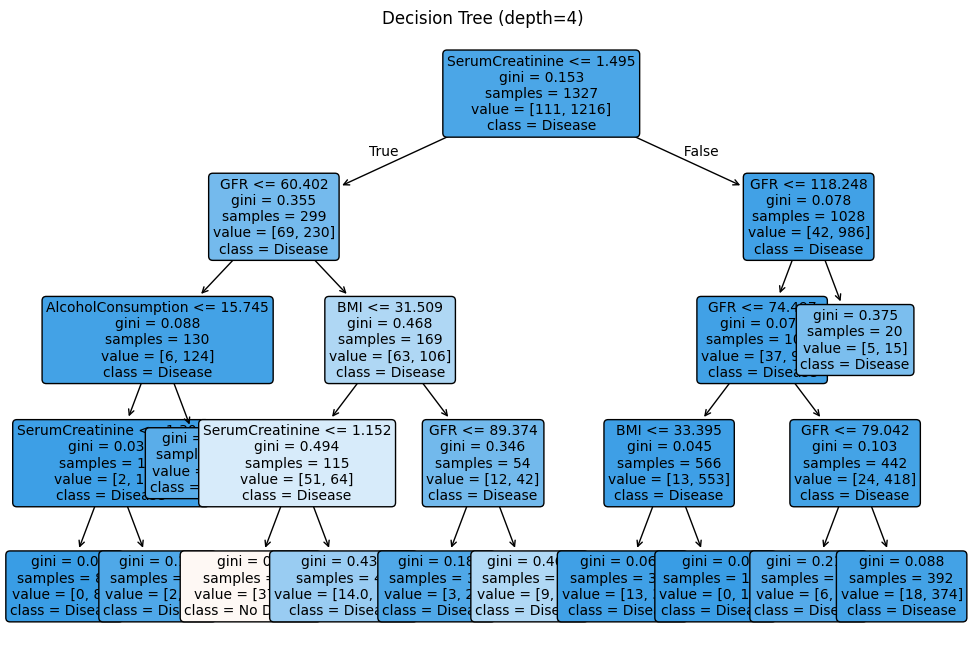

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

features = ['GFR', 'SerumCreatinine', 'BMI', 'Smoking', 'AlcoholConsumption']
X = df_health[features]
y = df_health['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


dt = DecisionTreeClassifier(
    max_depth=4,        
    min_samples_leaf=20,
    random_state=42
)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


importances = pd.Series(dt.feature_importances_, index=features)
print("\nFeature importances:\n", importances.sort_values(ascending=False))


plt.figure(figsize=(12,8))
plot_tree(
    dt,
    feature_names=features,
    class_names=['No Disease','Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (depth=4)")
plt.show()


Accuracy:       0.8564102564102564

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.38      0.30        16
           1       0.94      0.90      0.92       179

    accuracy                           0.86       195
   macro avg       0.60      0.64      0.61       195
weighted avg       0.88      0.86      0.87       195

Confusion Matrix:
 [[  6  10]
 [ 18 161]]


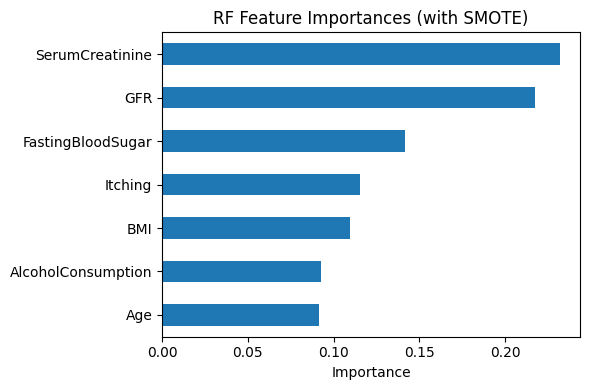

In [ ]:

import imblearn.over_sampling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE


df_filtered = df_health[df_health['Ethnicity'] == 0].copy()


features = [
    'GFR',
    'SerumCreatinine',
    'BMI',
    'AlcoholConsumption',
    'FastingBloodSugar',
    'Age',
    'Itching'
]
X = df_filtered[features]
y = df_filtered['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_res, y_res)


y_pred = rf.predict(X_test)
print("Accuracy:      ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


importances = pd.Series(rf.feature_importances_, index=features).sort_values()
plt.figure(figsize=(6,4))
importances.plot(kind='barh')
plt.title('RF Feature Importances (with SMOTE)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()



Accuracy:       0.8769230769230769

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.31      0.29        16
           1       0.94      0.93      0.93       179

    accuracy                           0.88       195
   macro avg       0.61      0.62      0.61       195
weighted avg       0.88      0.88      0.88       195

Confusion Matrix:
 [[  5  11]
 [ 13 166]]


/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:31:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Axes: title={'center': 'XGB Feature Importances'}>

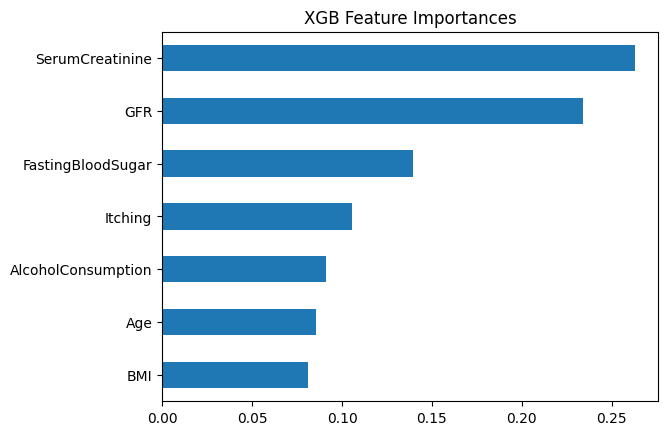

In [55]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


df_filtered = df_health[~df_health['Ethnicity'].isin([1, 2, 3])].copy()


features = [
    'GFR',
    'SerumCreatinine',
    'BMI',
    'AlcoholConsumption',
    'Itching',
    'FastingBloodSugar',
    'Age'
]
X = df_filtered[features]
y = df_filtered['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos


model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42,
    n_estimators=100
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:      ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


importances = pd.Series(model.feature_importances_, index=features).sort_values()
importances.plot(kind='barh', title='XGB Feature Importances')


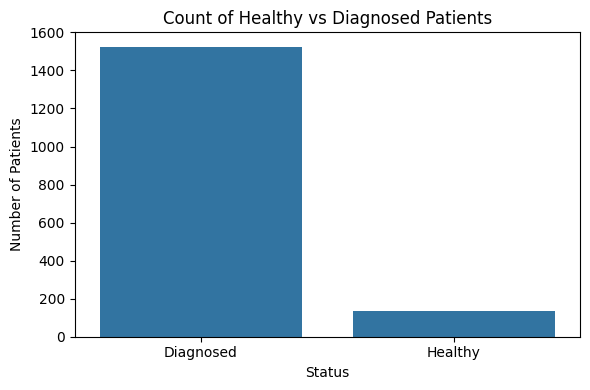

In [53]:

df_health['Status'] = df_health['Diagnosis'].map({0: 'Healthy', 1: 'Diagnosed'})

plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df_health)
plt.title('Count of Healthy vs Diagnosed Patients')
plt.ylabel('Number of Patients')
plt.xlabel('Status')
plt.tight_layout()
plt.show()


In [17]:
#Marketing Information EDA
# 1. Quick Summary
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [18]:
# 2. Stats
print(df_marketing.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [19]:
# 3. Dups
print("Row-dups:", df_marketing.duplicated().sum())

Row-dups: 0


In [20]:
# 4. Nulls
print("Nulls:\n", df_marketing.isnull().sum())

Nulls:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [21]:
# 5. Fix or drop
num_cols = df_marketing.select_dtypes(include=['int64','float64']).columns

means = df_marketing[num_cols].mean()

df_marketing_clean = df_marketing.copy()
df_marketing_clean[num_cols] = df_marketing_clean[num_cols].fillna(means)

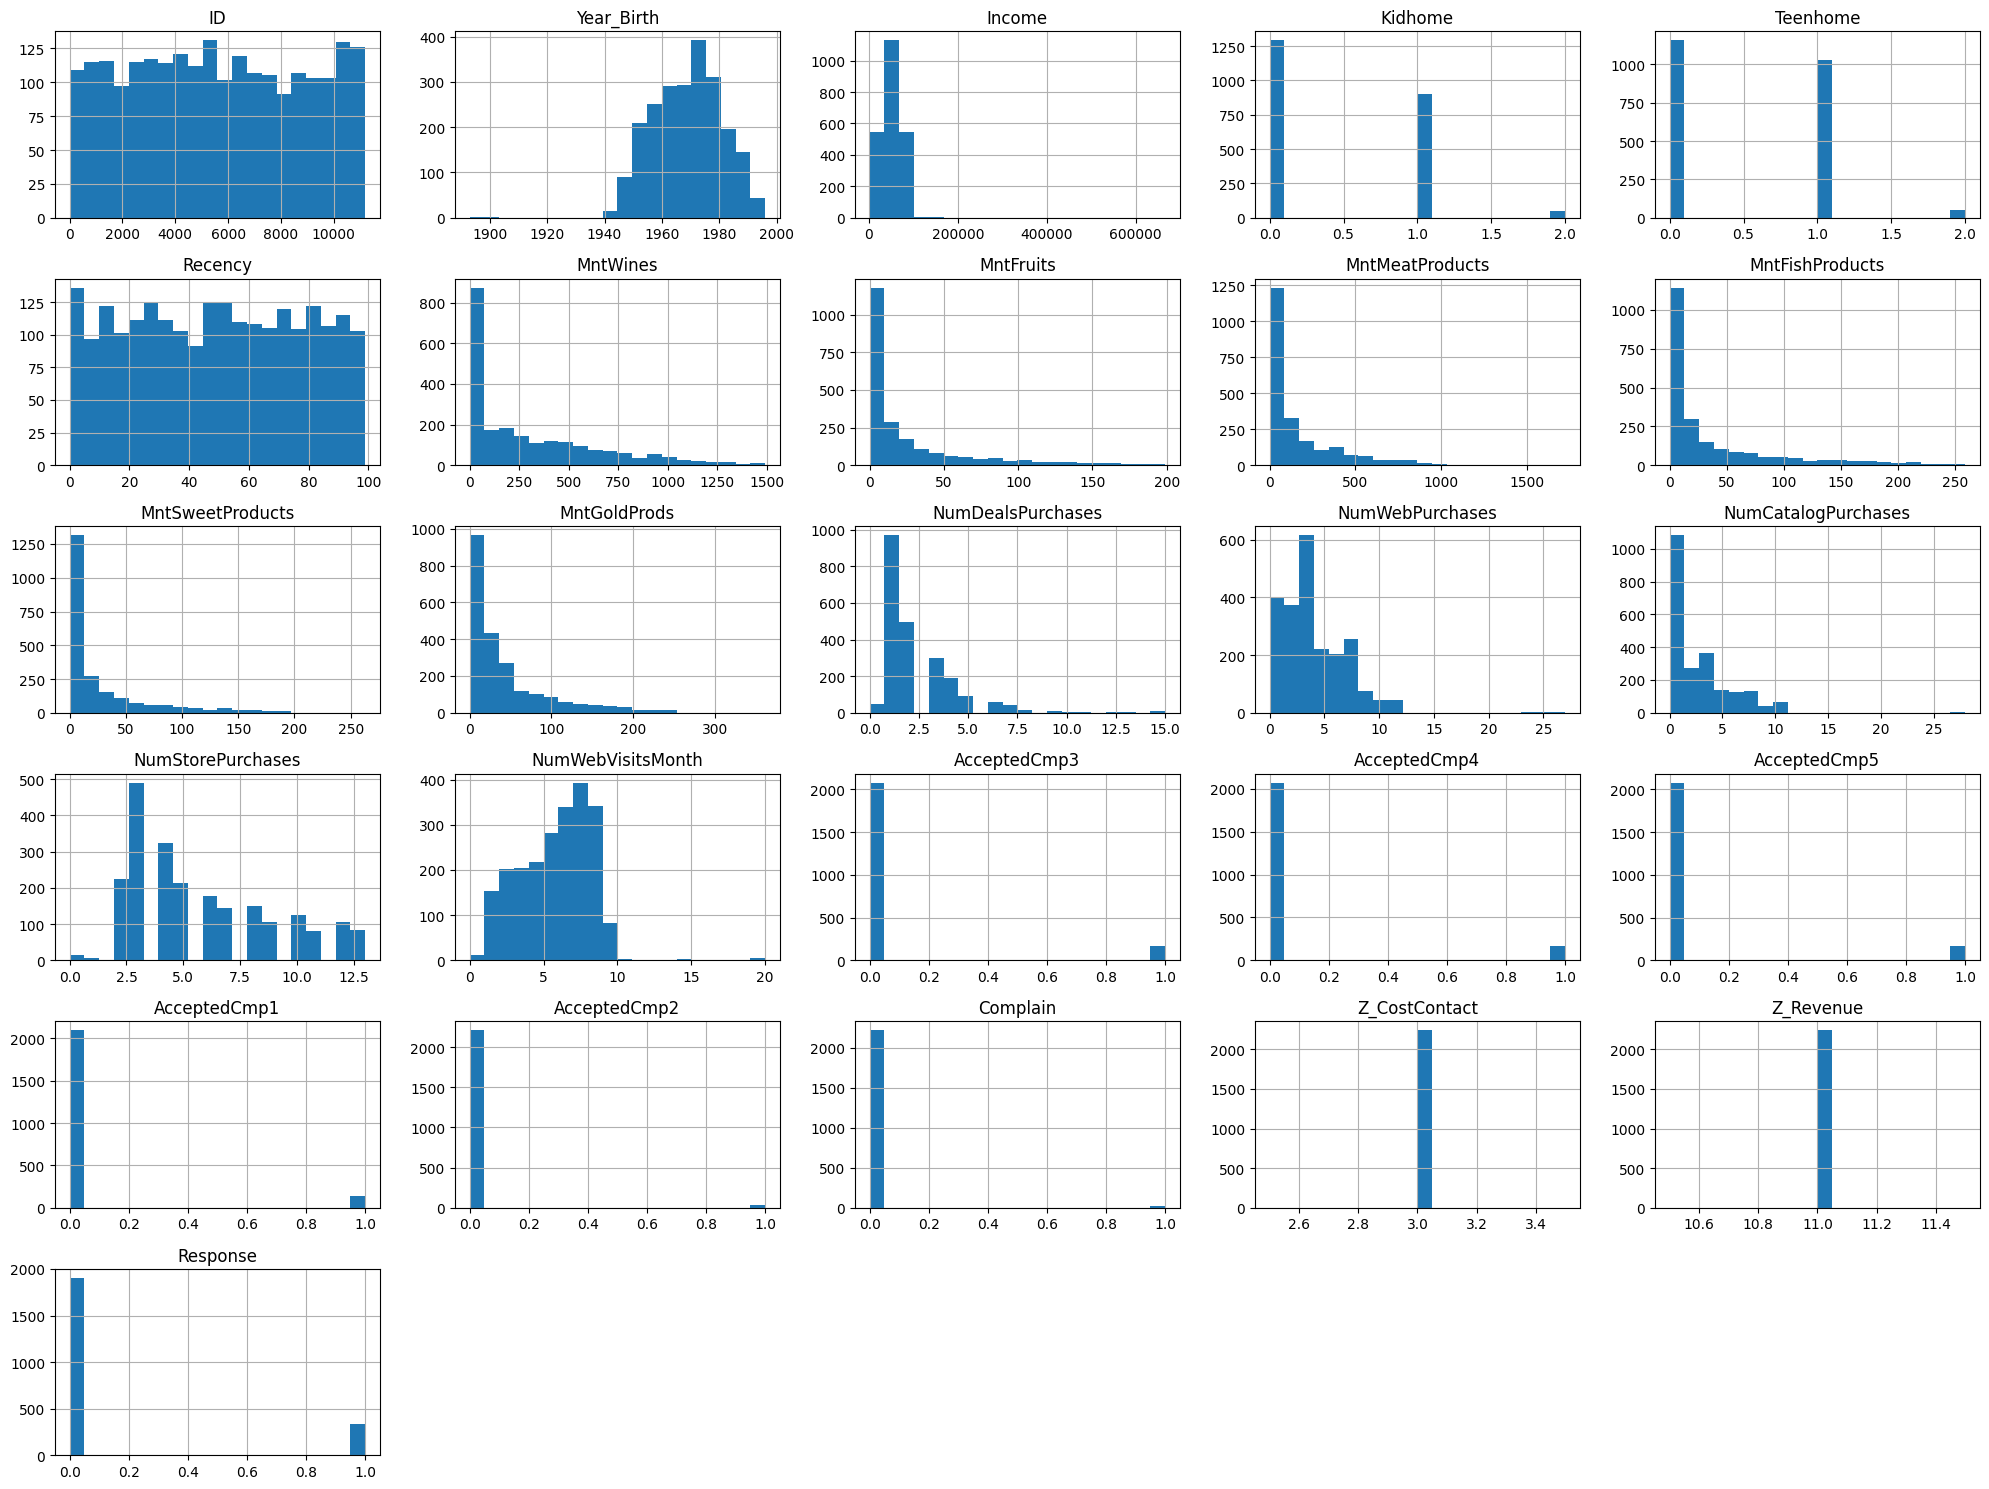

In [22]:
# 6. Histogram Frequency 

num_cols = df_marketing_clean.select_dtypes(include=['int64','float64']).columns

# draw a histogram for each numeric column
df_marketing_clean[num_cols].hist(bins=20, figsize=(20, 15))

plt.tight_layout()
plt.show()

In [23]:
df = df_marketing_clean.copy()
df['Age'] = 2025 - df['Year_Birth']

bins   = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73]
labels = [f"{start}-{end-1}" for start, end in zip(bins[:-1], bins[1:])]

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    right=False
)
summary = (
    df
    .groupby('AgeGroup')[['Income','Kidhome','Teenhome']]
    .mean()
    .rename(columns={
        'Income':   'Avg Income',
        'Kidhome':  'Avg Kids at Home',
        'Teenhome': 'Avg Teens at Home'
    })
    .round(2)
)

summary


/tmp/ipykernel_8659/3287581858.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('AgeGroup')[['Income','Kidhome','Teenhome']]


,Avg Income,Avg Kids at Home,Avg Teens at Home
AgeGroup,,,
18-22,NaN,NaN,NaN
23-27,NaN,NaN,NaN
28-32,63576.87,0.00,0.00
33-37,47046.01,0.45,0.00
38-42,43407.53,0.64,0.00
43-47,47761.39,0.63,0.25
48-52,50897.19,0.55,0.53
53-57,50646.41,0.56,0.55
58-62,53340.21,0.37,0.78


In [62]:
bracket_means = df_marketing.groupby('AgeGroup')['Income'].transform('mean')


df_marketing['Income'] = (
    df_marketing['Income']
      .fillna(bracket_means)      
      .fillna(df_marketing['Income'].mean())  
)



/tmp/ipykernel_8659/598996564.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bracket_means = df_marketing.groupby('AgeGroup')['Income'].transform('mean')


In [60]:
df_marketing.isnull().sum()

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
AgeGroup               234
dtype: int64

In [61]:

print(df_marketing.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   51438.215325     0.444196     0.506250   
std     3246.662198    11.984069   24125.179004     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   36144.500000     0.000000     0.000000   
50%     5458.500000  1970.000000   51438.215325     0.000000     0.000000   
75%     8427.750000  1977.000000   65487.250000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

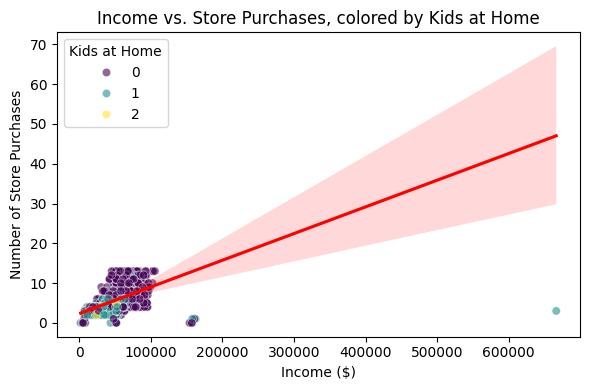

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Income',
    y='NumStorePurchases',
    hue='Kidhome',               
    palette='viridis',           
    data=df_marketing,
    alpha=0.6
)
sns.regplot(
    x='Income',
    y='NumStorePurchases',
    data=df_marketing,
    scatter=False,              
    line_kws={'color':'red'}
)
plt.title('Income vs. Store Purchases, colored by Kids at Home')
plt.xlabel('Income ($)')
plt.ylabel('Number of Store Purchases')
plt.legend(title='Kids at Home')
plt.tight_layout()
plt.show()


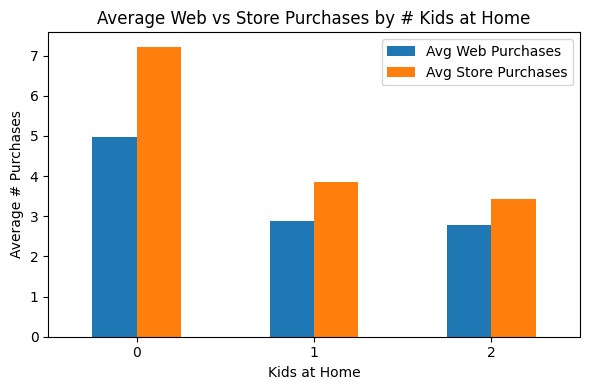

In [65]:
# 1) Compute the group means
grp = (df_marketing
         .groupby('Kidhome')[['NumWebPurchases','NumStorePurchases']]
         .mean()
         .rename(columns={
             'NumWebPurchases':'Avg Web Purchases',
             'NumStorePurchases':'Avg Store Purchases'
         }))

# 2) Display as a bar chart
grp.plot(kind='bar', figsize=(6,4))
plt.title('Average Web vs Store Purchases by # Kids at Home')
plt.ylabel('Average # Purchases')
plt.xlabel('Kids at Home')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [74]:
# pick only the numeric cols (auto-drop anything non-numeric)
X = df_marketing.select_dtypes(include=['int64','float64']) \
                .drop(columns=['ID','AcceptedCmp1'])
y = df_marketing['AcceptedCmp1']

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=0)
rf.fit(X, y)



RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

/tmp/ipykernel_8659/4131085125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


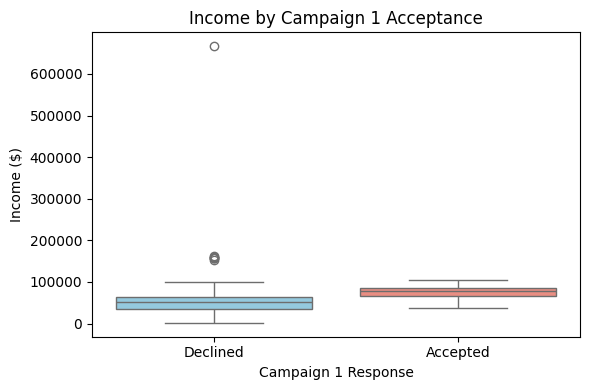

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='AcceptedCmp1',
    y='Income',
    data=df_marketing,
    palette=['skyblue','salmon']
)
plt.xticks([0,1], ['Declined','Accepted'])
plt.xlabel('Campaign 1 Response')
plt.ylabel('Income ($)')
plt.title('Income by Campaign 1 Acceptance')
plt.tight_layout()
plt.show()


/tmp/ipykernel_8659/2686048387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


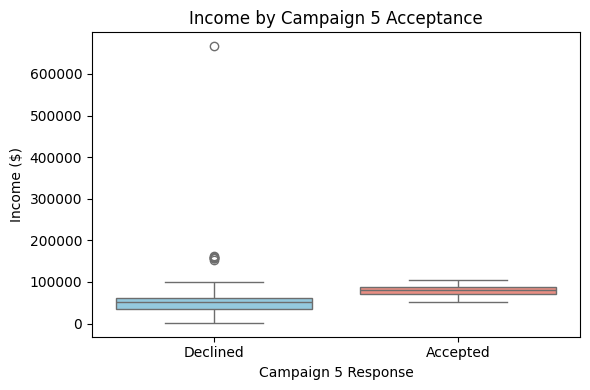

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='AcceptedCmp5',
    y='Income',
    data=df_marketing,
    palette=['skyblue','salmon']
)
plt.xticks([0,1], ['Declined','Accepted'])
plt.xlabel('Campaign 5 Response')
plt.ylabel('Income ($)')
plt.title('Income by Campaign 5 Acceptance')
plt.tight_layout()
plt.show()

In [66]:
#Energy Information EDA
# 1. Quick Summary

df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28075 entries, 0 to 28074
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28075 non-null  object 
 1   commodity  28075 non-null  object 
 2   date       28075 non-null  object 
 3   open       28075 non-null  float64
 4   high       28075 non-null  float64
 5   low        28075 non-null  float64
 6   close      28075 non-null  float64
 7   volume     28075 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [82]:
# 2. Stats
print(df_energy.describe())

               open          high           low         close        volume
count  28075.000000  28075.000000  28075.000000  28075.000000  2.807500e+04
mean      27.288994     27.680580     26.873389     27.287224  1.059926e+05
std       36.085625     36.540236     35.599243     36.089001  1.484400e+05
min      -14.000000      0.507000    -40.320000    -37.630001  0.000000e+00
25%        2.031000      2.060550      1.998200      2.031250  2.641100e+04
50%        3.374000      3.450000      3.301000      3.375900  4.903300e+04
75%       54.895000     55.745001     53.910000     54.900000  1.147245e+05
max      146.080002    147.429993    144.270004    146.080002  2.288230e+06


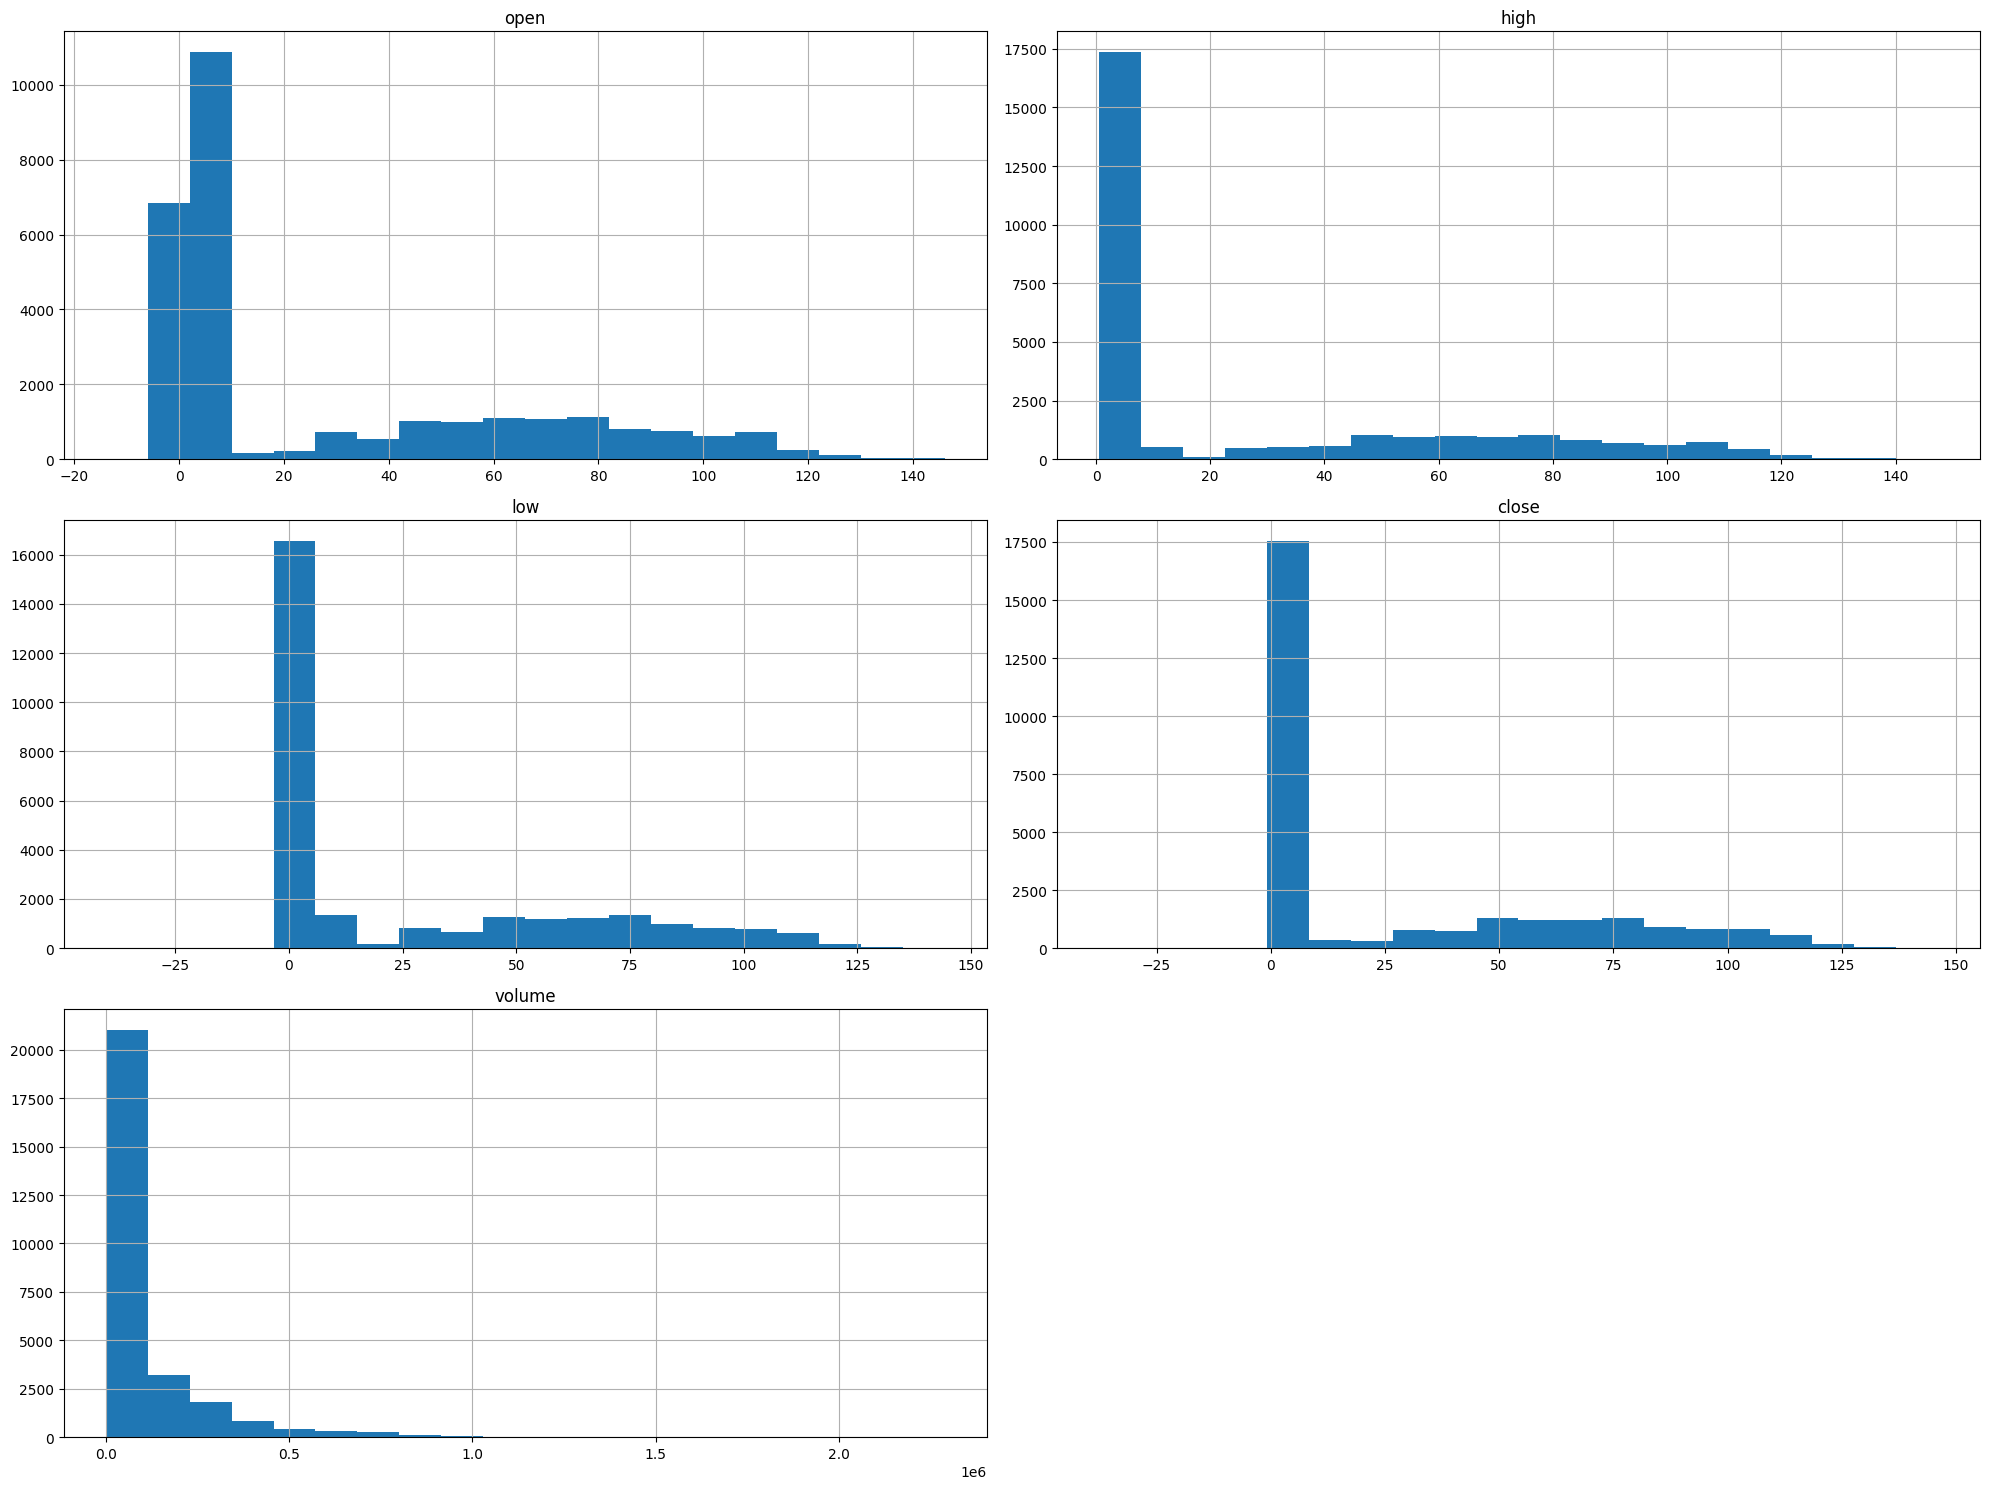

In [83]:
# 3. Frequency 

num_cols = df_energy.select_dtypes(include=['int64','float64']).columns

# draw a histogram for each numeric column
df_energy[num_cols].hist(bins=20, figsize=(20, 15))

plt.tight_layout()
plt.show()